# Clustering Assignment

### Problem Statement : 

-  HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of      backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of        operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

   After the recent funding programmes, they have been able to raise around  10 million. Now the CEO of the NGO needs to          decide how to use this money strategically and effectively. The significant issues that come while making this decision are    mostly related to choosing the countries that are in the direst need of aid.

###  Business Goal :
-  Identify top countries that are direst need of aid. Your job is to categorise the countries using some socioeconomic
   and health factors that determine the overall development of the country. Then you need to suggest the countries which
   the CEO needs to focus on the most.

### Step 1 . Reading and Understanding of data

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Libraries for K-Means and Hierarchical Clustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [5]:
# Other required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [6]:
# Read the dataset
country_df = pd.read_csv('Country-data.csv')
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
# check no. of rows, no. of columns
country_df.shape

(167, 10)

In [8]:
# check basic info
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
# checking duplicate values
country_df.drop_duplicates(subset=None, inplace=True)
country_df.shape

(167, 10)

In [10]:
# Check missing values in cloumns if any
round(100*(country_df.isnull().sum()/len(country_df)),2).sort_values(ascending=True)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [11]:
# check missing values in rows if any 
country_df.isnull().sum(axis=1).value_counts(ascending=False)

0    167
dtype: int64

In [12]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Step 2. EDA and Data Visualisation

In [13]:
#lets convert exports, health and imports from percentage value to GDP per capita. As it will not provide correct value 
#for the country. For example - Afghanistan and Albania has almost same import percentage but their GDPP values are very different. 
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


####  Univariate and Bivariate Analysis

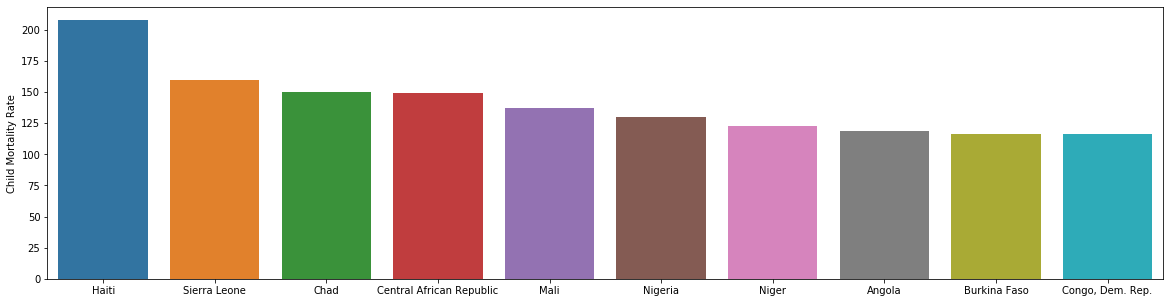

In [14]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births in top 10 countries
plt.figure(figsize=(20,5))
top10_child_mort = country_df[['country','child_mort']].sort_values('child_mort',ascending=False).head(10)
axs = sns.barplot(x='country', y='child_mort', data= top10_child_mort)
axs.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.show()

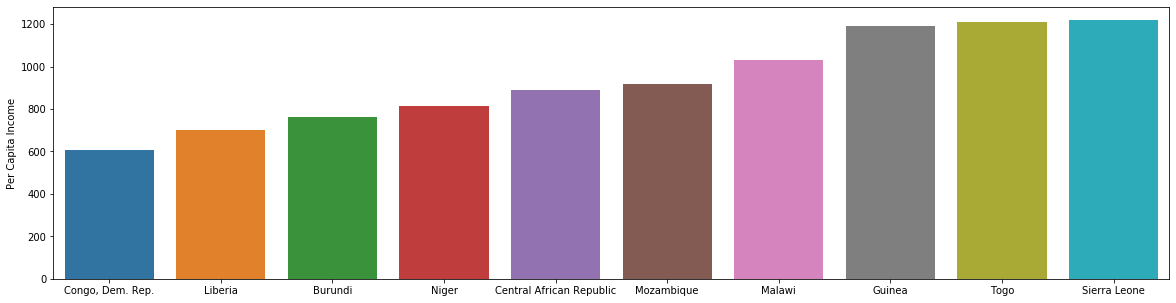

In [15]:
# Per capita Income : Bottom 10 countries in which Net income per person is very low
plt.figure(figsize=(20,5))
bottom10_income = country_df[['country','income']].sort_values('income',ascending=True).head(10)
axs = sns.barplot(x='country', y='income', data= bottom10_income)
axs.set(xlabel = '', ylabel= 'Per Capita Income')
plt.show()

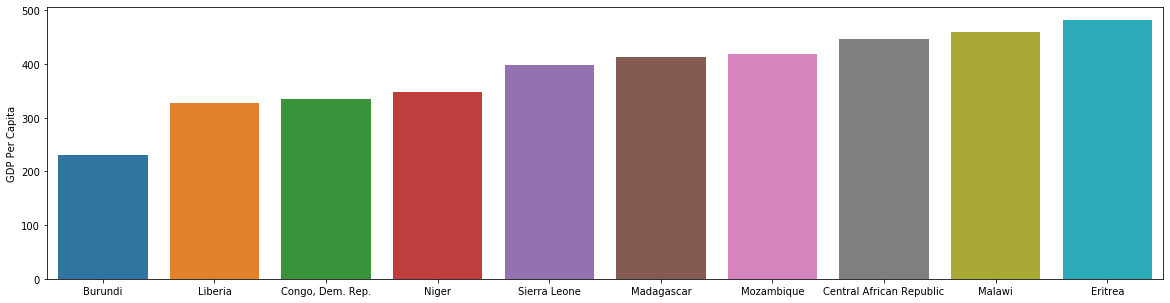

In [16]:
# GDP per capita : Bottom 10 countries with Calculated Total GDP divided by the total population.
plt.figure(figsize=(20,5))
bottom10_gdpp = country_df[['country','gdpp']].sort_values('gdpp',ascending=True).head(10)
axs = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp)
axs.set(xlabel = '', ylabel= 'GDP Per Capita')
plt.show()

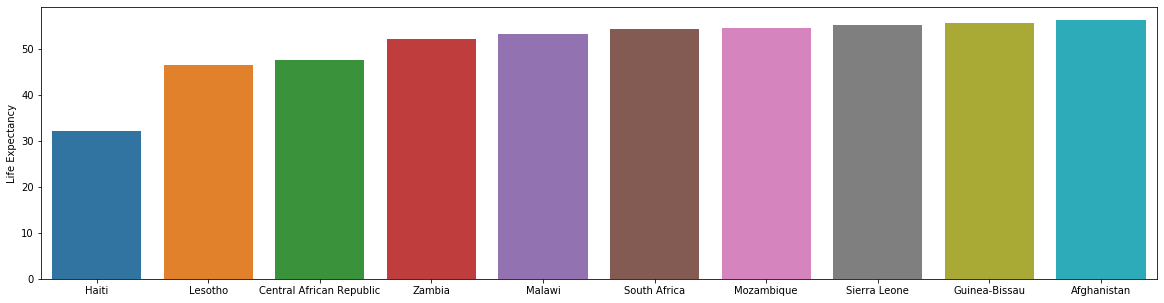

In [17]:
# Life Expectancy: Bottom top 10 countries which has average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize=(20,5))
bottom10_life_expec = country_df[['country','life_expec']].sort_values('life_expec',ascending=True).head(10)
axs = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec)
axs.set(xlabel = '', ylabel= 'Life Expectancy')
plt.show()

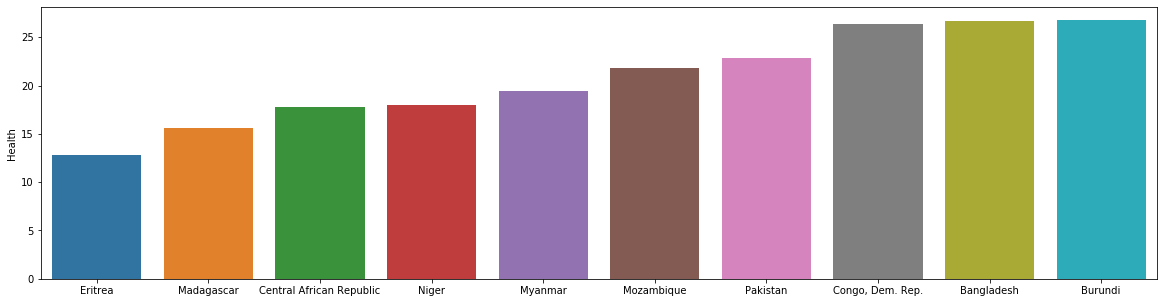

In [18]:
# Health : Bottom 10 countires which Total health spending as %age of Total GDP.
plt.figure(figsize=(20,5))
bottom10_health = country_df[['country','health']].sort_values('health',ascending=True).head(10)
axs = sns.barplot(x='country', y='health', data= bottom10_health)
axs.set(xlabel = '', ylabel= 'Health')
plt.show()

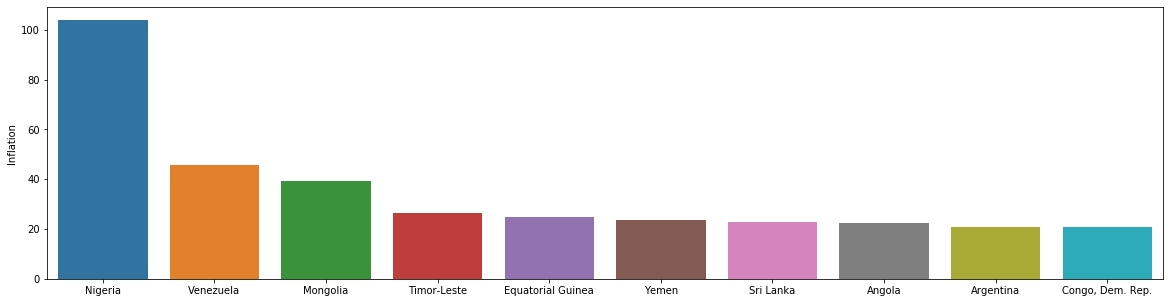

In [19]:
# Inflation: List of top 10 countires with measurement of the annual growth rate of the Total GDP
plt.figure(figsize=(20,5))
top10_inflation = country_df[['country','inflation']].sort_values('inflation', ascending = False).head(10)
axs = sns.barplot(x='country', y='inflation', data= top10_inflation)
axs.set(xlabel = '', ylabel= 'Inflation')
plt.show()

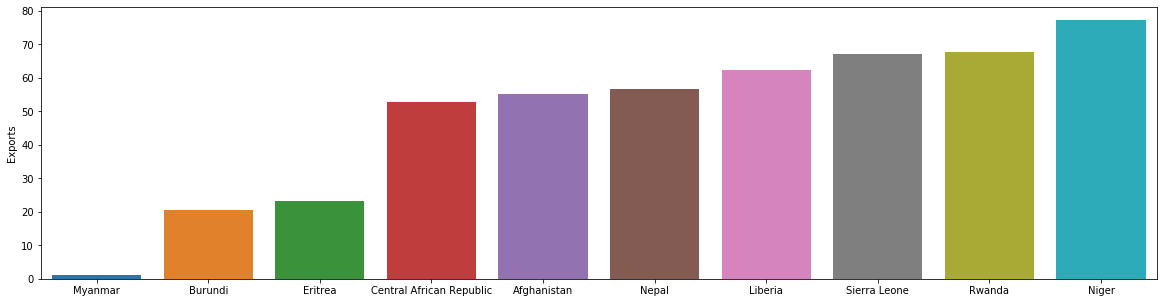

In [20]:
# Exports: List of bottom 10 countries which has less Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize=(20,5))
bottom10_exports = country_df[['country','exports']].sort_values('exports', ascending = True).head(10)
axs = sns.barplot(x='country', y='exports', data= bottom10_exports)
axs.set(xlabel = '', ylabel= 'Exports')
plt.show()

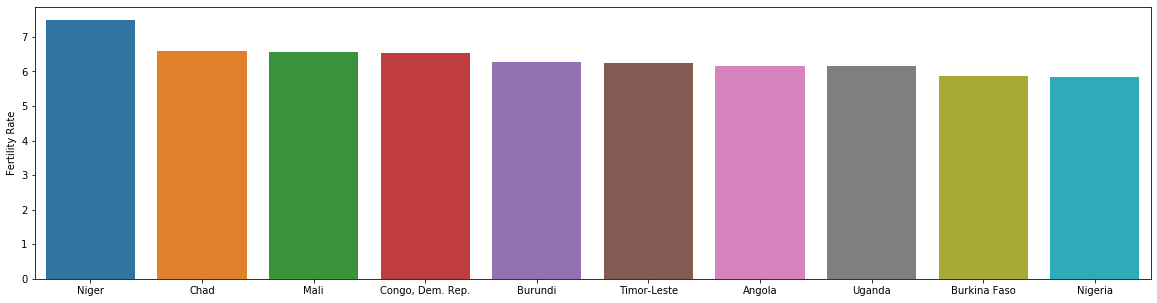

In [21]:
# Fertility Rate: top 10 countries number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize=(20,5))
top10_total_fer = country_df[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
axs = sns.barplot(x='country', y='total_fer', data= top10_total_fer)
axs.set(xlabel = '', ylabel= 'Fertility Rate')
plt.show()

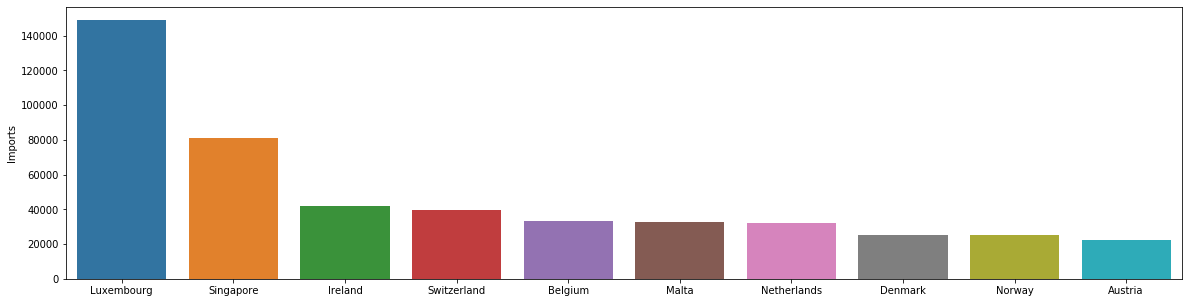

In [22]:
# Imports: List of bottom 10 countries which has imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize=(20,5))
bottom10_imports = country_df[['country','imports']].sort_values('imports', ascending = False).head(10)
axs = sns.barplot(x='country', y='imports', data= bottom10_imports)
axs.set(xlabel = '', ylabel= 'Imports')
plt.show()

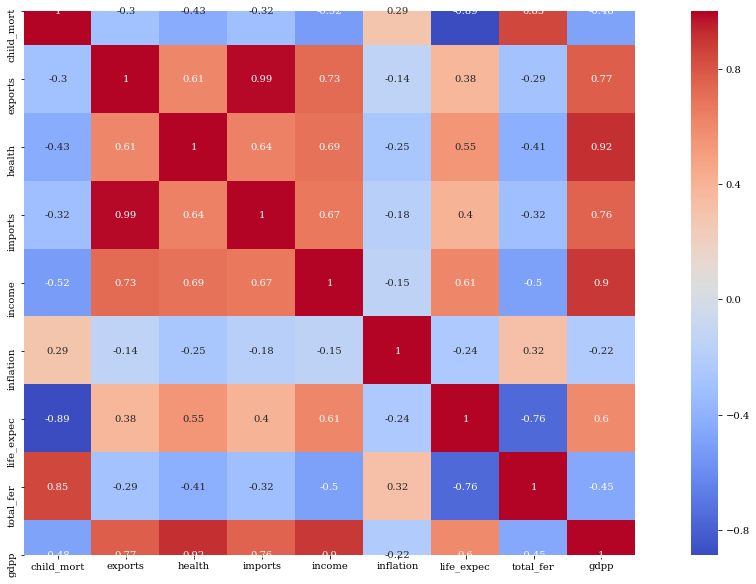

In [23]:
# Lets visualise using heatmap to check the correlation coefficients to see which variables are highly correlated
#plt.figure(figsize = (15,15))
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"
sns.heatmap(country_df.corr(), annot = True, cmap='coolwarm', square=True)
plt.show()

In [24]:
# From above heatmap we can see between import and exports (0.99), between health and gdpp(0.92), between income and gdpp(0.9) 
# are highly correlated with each other. There are negative correlated pair also like between child_mort and life_expec(-0.89).

In [25]:
# Visualise continuous variable with Histogram.

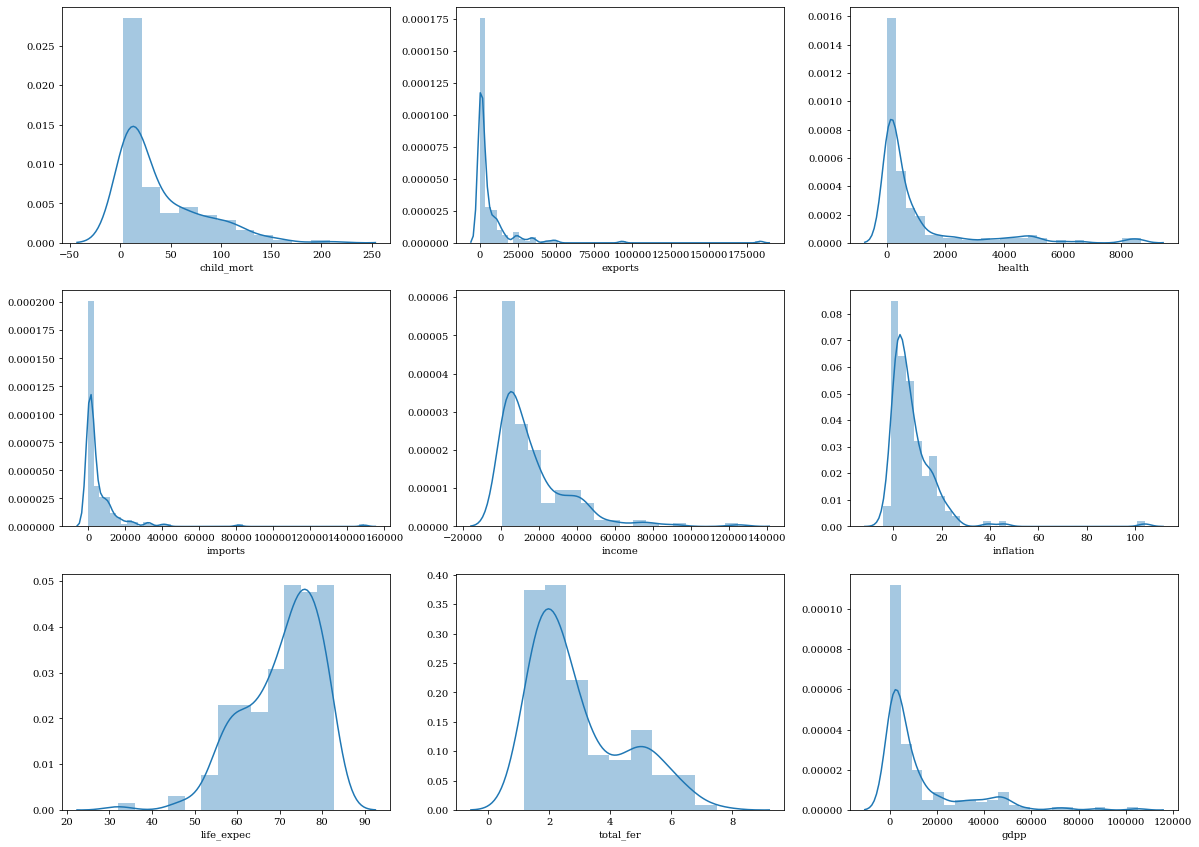

In [26]:
plt.figure(figsize = (20,20))
columns=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(columns):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(country_df[i[1]])

#### Outlier Analysis

In [27]:
#Lets check the outliers
country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,17760.600000,3825.416000,15034.280000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,31385.100000,4966.701000,24241.560000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


In [28]:
#Noticed from above Health and GDPP are having lots of outliers, even all are having outliers. Lets check outliers with boxplot.

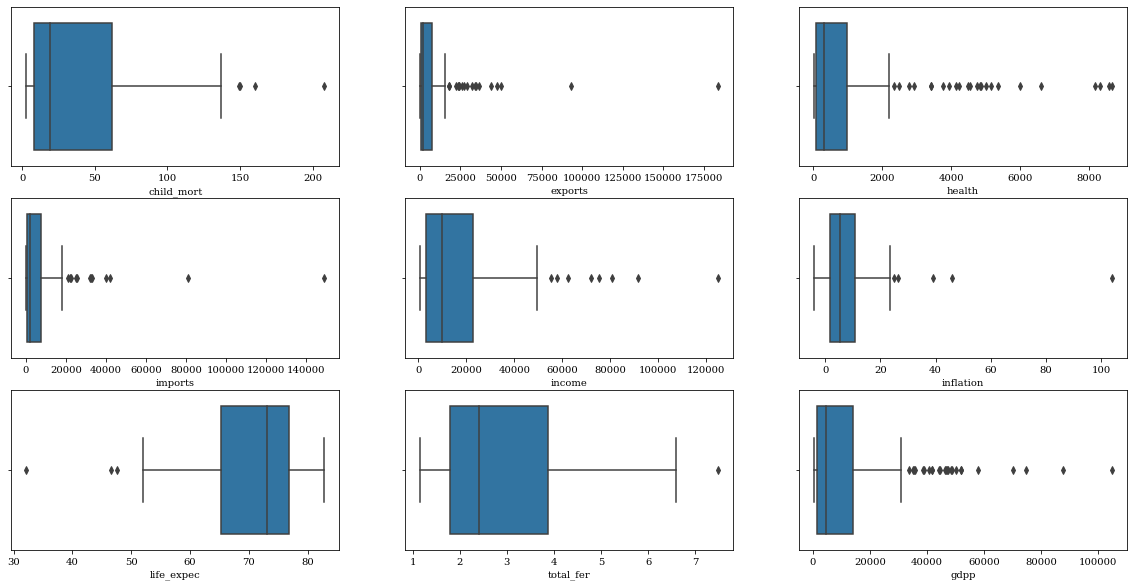

In [29]:
# lets plot the boxplot.
fig, axs = plt.subplots(3,3, figsize=(20,10))
plot_child_mort = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plot_exports = sns.boxplot(country_df['exports'], ax = axs[0,1])
plot_health = sns.boxplot(country_df['health'], ax = axs[0,2])
plot_imports = sns.boxplot(country_df['imports'], ax = axs[1,0])
plot_income = sns.boxplot(country_df['income'], ax = axs[1,1])
plot_inflation = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plot_life_expec = sns.boxplot(country_df['life_expec'], ax = axs[2,0])
plot_total_fer = sns.boxplot(country_df['total_fer'], ax = axs[2,1])
plot_gdpp = sns.boxplot(country_df['gdpp'], ax = axs[2,2])
plt.show()

In [30]:
# Outlier Treatment - Less dataset present (167, 10) for analysis so , too much outlier treatment is also not possible otherwise
# will loose the. Performing IQR (inter-quartile range) with less than or equal to Q3 (third quartile) for outlier treatment.

In [31]:
# 1) Child_Mortality -> outliers present in upper range, but no outlier treatment is needed as business has an interest on 
#                       high child mortality rate countries.
# 2) Exports -> outliers present in upper range, so will cap it at 95% quartile range.
# 3) Imports -> outliers present in upper range, so will cap it at 95% quartile range.
# 4) Health -> outliers present in upper range, so will cap it at 95% quartile range.
# 5) Income -> outliers present in upper range, so will cap it at 95%.
# 6) Inflation -> outliers present in upper range, so will cap at 95% quartile range.
# 7) Life Expectancy -> outliers present in lower range, but no outlier treatment is needed as business is interested on 
#   high child mortality rate countries, child_mortality and life_expentency are highly (-vely) correlated correlation of -0.89.
# 8) Total Fertility ->  outliers present in upper range, so will cap it at 95% quartile range.
# 9) GDPP ->  outliers present in upper range, so will cap at 95% quartile range.

Q3 = country_df.exports.quantile(0.95)
country_df= country_df[(country_df.exports <= Q3)]

Q3 = country_df.imports.quantile(0.95)
country_df= country_df[(country_df.imports <= Q3)]

Q3 = country_df.health.quantile(0.95)
country_df= country_df[(country_df.health <= Q3)]

Q3 = country_df.income.quantile(0.95)
country_df= country_df[(country_df.income <= Q3)]

Q3 = country_df.inflation.quantile(0.95)
country_df= country_df[(country_df.inflation <= Q3)]

Q3 = country_df.total_fer.quantile(0.95)
country_df= country_df[(country_df.total_fer <= Q3)]

Q3 = country_df.gdpp.quantile(0.95)
country_df= country_df[(country_df.gdpp <= Q3)]

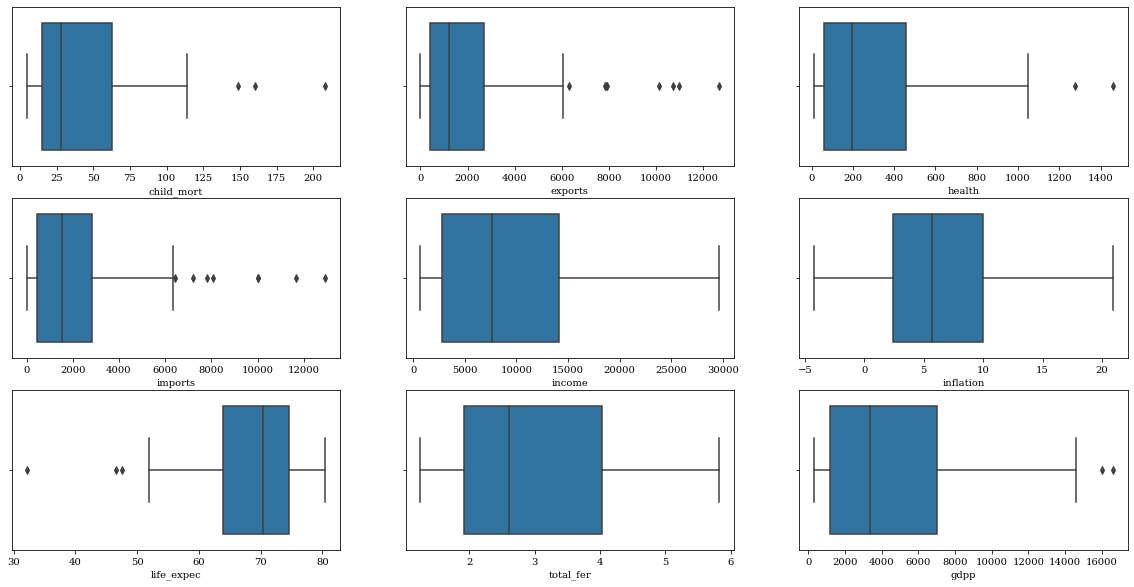

In [32]:
# lets plot the boxplot again after outlier treatment.
fig, axs = plt.subplots(3,3, figsize=(20,10))
plot_child_mort = sns.boxplot(country_df['child_mort'], ax = axs[0,0])
plot_exports = sns.boxplot(country_df['exports'], ax = axs[0,1])
plot_health = sns.boxplot(country_df['health'], ax = axs[0,2])
plot_imports = sns.boxplot(country_df['imports'], ax = axs[1,0])
plot_income = sns.boxplot(country_df['income'], ax = axs[1,1])
plot_inflation = sns.boxplot(country_df['inflation'], ax = axs[1,2])
plot_life_expec = sns.boxplot(country_df['life_expec'], ax = axs[2,0])
plot_total_fer = sns.boxplot(country_df['total_fer'], ax = axs[2,1])
plot_gdpp = sns.boxplot(country_df['gdpp'], ax = axs[2,2])
plt.show()

In [33]:
# Need to drop Country field as final dataframe will only contain data columns.
country_new_df = country_df.copy()
country_drop_df = country_new_df.pop('country')

In [34]:
country_new_df.shape

(114, 9)

In [35]:
country_new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
5,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


###  Step 3. Hopkins Statistics Test

In [36]:
# Import library to perform Hopkins Statistics 
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
hopkins(country_new_df)

0.8616182272015614

In [38]:
# Hopkins score is really good which is 0.86(>=80). Hopkins value different each time we run the kernel or each time we
# execute the code. It uses k-nearest neighbors algorithms due to which the value keeps changing.

### Step 4. Rescalling the data

In [39]:
# Import the standard scaler. Use StandardScaler method for scaling the data.
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaled_country_df=scaler.fit_transform(country_new_df)

In [41]:
scaled_country_df

array([[ 1.28391362, -0.7997509 , -0.86245254, ..., -1.49764372,
         2.14494745, -1.00893291],
       [-0.69059953, -0.3686681 , -0.13519648, ...,  0.95164671,
        -1.02732993, -0.14639404],
       [-0.40354395, -0.14423134, -0.39881432, ...,  0.97601776,
        -0.08401483, -0.0561652 ],
       ...,
       [-0.35257146, -0.2742088 , -0.49554574, ..., -0.66902805,
         0.38003533, -0.41951915],
       [-0.51085445, -0.44856417, -0.70898437, ...,  0.56170992,
        -0.79910854, -0.8243296 ],
       [ 1.09343749, -0.60796078, -0.72060231, ..., -2.00943575,
         1.8254375 , -0.78775034]])

In [42]:
scaled_country_df1 = pd.DataFrame(scaled_country_df)
scaled_country_df1.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
scaled_country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.283914,-0.799751,-0.862453,-0.810688,-1.090722,0.438327,-1.497644,2.144947,-1.008933
1,-0.690600,-0.368668,-0.135196,-0.106679,0.120363,-0.452051,0.951647,-1.027330,-0.146394
2,-0.403544,-0.144231,-0.398814,-0.344379,0.552685,1.636289,0.976018,-0.084015,-0.056165
3,-0.859614,1.373936,1.370196,1.997144,1.455177,-1.000667,1.012574,-0.662176,1.831324
4,-0.746938,-0.051655,1.687646,-0.244183,1.396951,2.499685,0.890719,-0.479599,1.367987


### Step 5. Model Building with K-Means

####  Sum of Squared Method (Elbow Curve)

In [43]:
# Elbow curve method to finding out the number of clusters (sum of squared distance method).

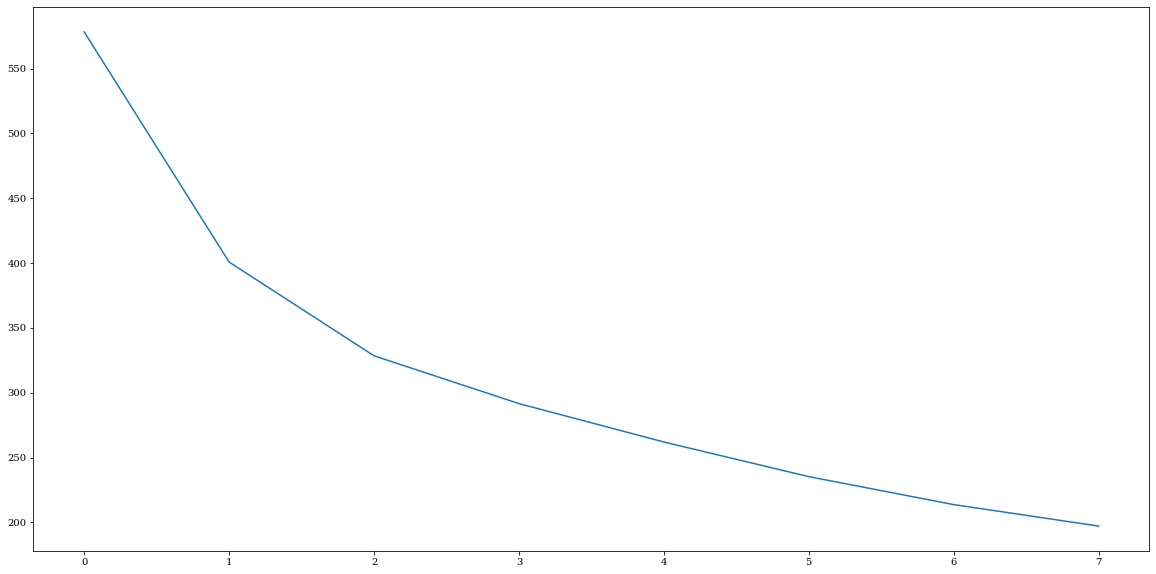

In [44]:
ssd = []
for num_clusters in list(range(2,10)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150)
    model_clus.fit(scaled_country_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [45]:
# From above Elbow curve , will proceed with 3 clusters.

#### Silhouette Analysis

In [46]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
sse_ = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(scaled_country_df1)
    
    cluster_labels = kmeans.labels_
    sse_.append([num_clusters, silhouette_score(scaled_country_df1, cluster_labels)])

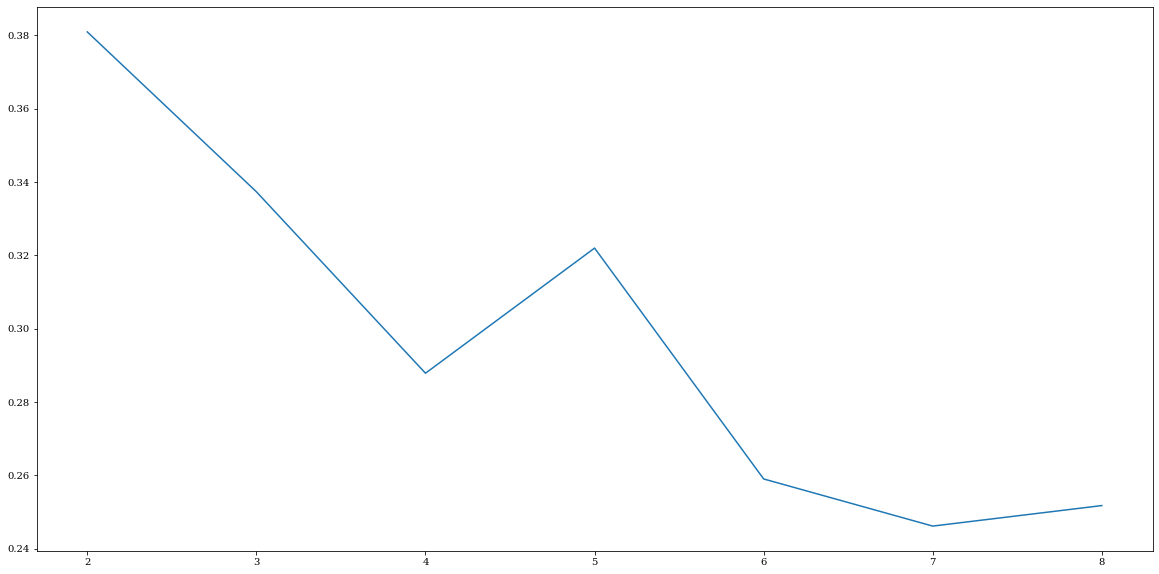

In [47]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]); 

In [48]:
# K-means with k=3 clusters which is good to go as if we increase with K =4 or 5 then coutries will split in more cluster and 
# that will create problem during clustering. It might less records present in atleast 2 clusters.
cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(scaled_country_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [49]:
# Cluster labels
cluster.labels_

array([2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 2, 0, 2,
       1, 0, 0, 2, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0,
       2, 2, 1, 1, 2, 1, 0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1,
       2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 2])

In [50]:
# Assignment of Labels to new column ClusterID.
country_df['ClusterID'] = cluster.labels_
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,1


In [51]:
# To check no. of countries present in each cluster
country_df['ClusterID'].value_counts()

0    56
2    31
1    27
Name: ClusterID, dtype: int64

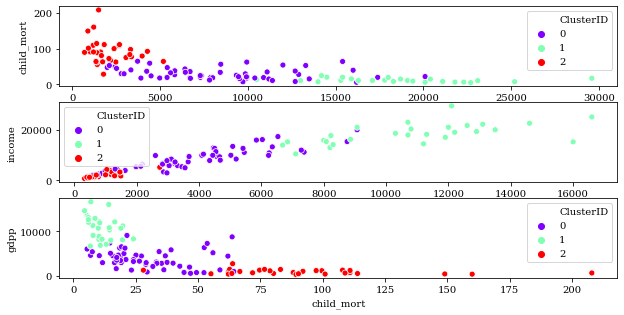

In [52]:
# Using scatterplot visualise the data on original dataset.
plt.figure(figsize = (10,5))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='ClusterID',data = country_df,legend='full',palette="rainbow")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='ClusterID', data = country_df,legend='full',palette="rainbow")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='ClusterID', data= country_df,legend='full',palette="rainbow")
plt.show()

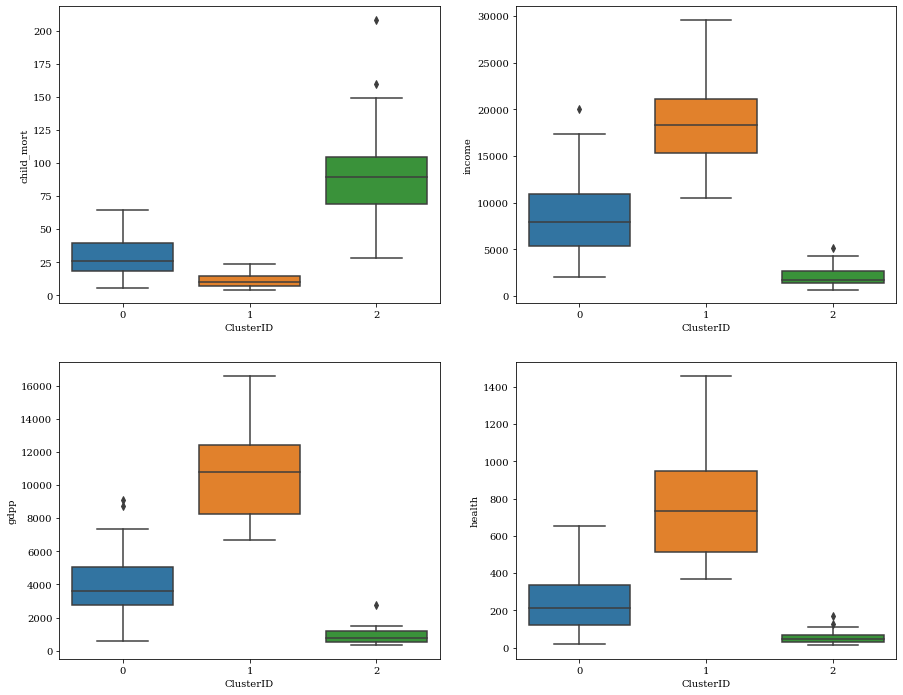

In [53]:
# Using Boxplot visualise the data on original dataset.
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.boxplot(x = 'ClusterID', y = 'child_mort', data = country_df,ax=axes[0][0])
sns.boxplot(x = 'ClusterID', y = 'income', data = country_df,ax=axes[0][1])
sns.boxplot(x = 'ClusterID', y = 'gdpp', data=country_df,ax=axes[1][0])
sns.boxplot(x = 'ClusterID', y = 'health', data=country_df,ax=axes[1][1])
plt.show()

In [54]:
#From above Boxplot, clusterID1 has very less children mortality countries present and clusterID1 has very high GDPP and income.
# Cluster2 needs to be aid for socio-economic factors.

In [55]:
# Lets check the mean of 3 important factor child_mort, income and gdpp. By seeing mean, ClusterID2 needs more help.
country_df[['child_mort','income','gdpp','ClusterID']].groupby('ClusterID').mean()

,child_mort,income,gdpp
ClusterID,,,
0,29.953571,8435.357143,3836.107143
1,11.503704,18525.925926,10809.629630
2,91.580645,2102.451613,903.677419


#### Cluster Profiling on K-Means

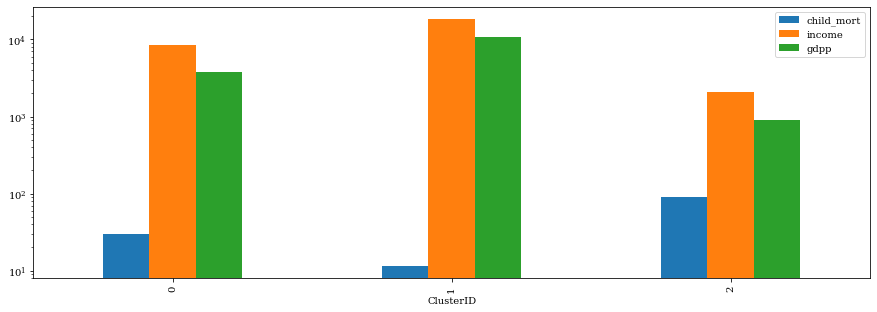

In [56]:
labels=country_df[['child_mort','income','gdpp','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar',figsize = (15,5))
plt.yscale('log')
plt.show();

In [57]:
# By observing above cluster profiling, ClusterID2 has very high children mortality and that needs to be aid.

In [58]:
# K-Means cluster =1 which has high GDPP, high income and low child_mortality among all 3 clusters.
KMeans_Cluster1 = country_df[country_df['ClusterID']==1].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
KMeans_Cluster1.reset_index(drop=True).country[:5]

0    Suriname
1      Brazil
2      Panama
3      Turkey
4       Libya
Name: country, dtype: object

In [59]:
# K-Means cluster =2 which has high child_mortality among all 3 clusters and this is useful for analysis.
KMeans_Cluster2 = country_df[country_df['ClusterID']==2].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
KMeans_Cluster2.reset_index(drop=True).country[:5]

0                       Haiti
1                Sierra Leone
2    Central African Republic
3               Guinea-Bissau
4                       Benin
Name: country, dtype: object

In [60]:
# K-Means cluster =0 which has good GDPP, good income and moderate child_mortality among all 3 clusters.
KMeans_Cluster0 = country_df[country_df['ClusterID']==0].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
KMeans_Cluster0.reset_index(drop=True).country[:5]

0         Myanmar
1           Gabon
2    Turkmenistan
3           India
4         Namibia
Name: country, dtype: object

In [61]:
Final_country_by_KM = country_df[country_df['ClusterID']==2].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
Final_country_by_KM['country']
Final_country_by_KM.reset_index(drop=True).country[:5]

0                       Haiti
1                Sierra Leone
2    Central African Republic
3               Guinea-Bissau
4                       Benin
Name: country, dtype: object

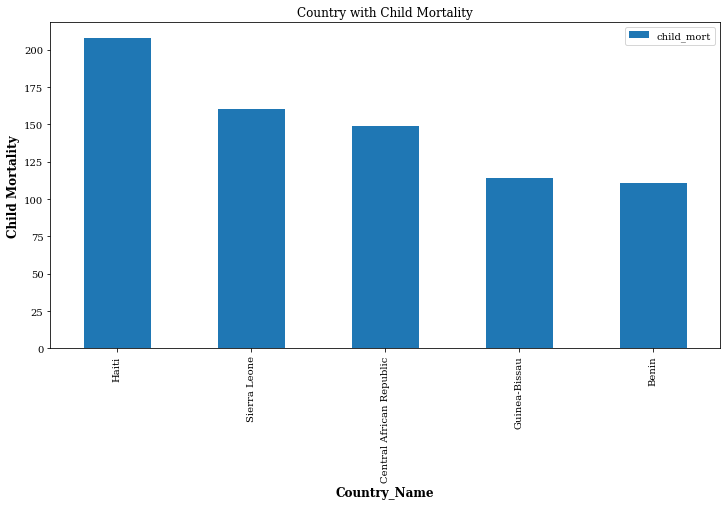

In [62]:
# Visualise using Barplot on Child Mortality of countries which are in need of aid based on socio-economic factors.
final_country_by_km_child = pd.DataFrame(KMeans_Cluster2.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
labels=final_country_by_km_child.plot(kind = 'bar',figsize = (12,6))
plt.title('Country with Child Mortality')
plt.xlabel('Country_Name',fontsize = 12, fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

In [63]:
# Above list of coutries are important for analysis due to high children mortality and these countries needs to be aid for socio-economic factors.

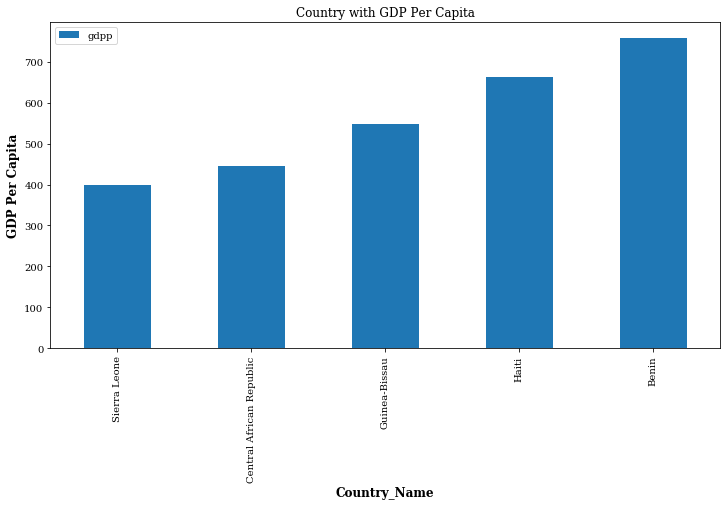

In [64]:
# Visualise using Barpplot for GDP per capita of countries which are in need of aid.
final_country_by_km_gdp = pd.DataFrame(KMeans_Cluster2.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
labels=final_country_by_km_gdp.plot(kind = 'bar',figsize = (12,6))
plt.title('Country with GDP Per Capita')
plt.xlabel('Country_Name',fontsize = 12, fontweight = 'bold')
plt.ylabel('GDP Per Capita', fontsize = 12, fontweight = 'bold')
plt.show()

In [65]:
# Above list of coutries are important for analysis due to low GDPP and these countries needs to be aid for socio-economic factors.

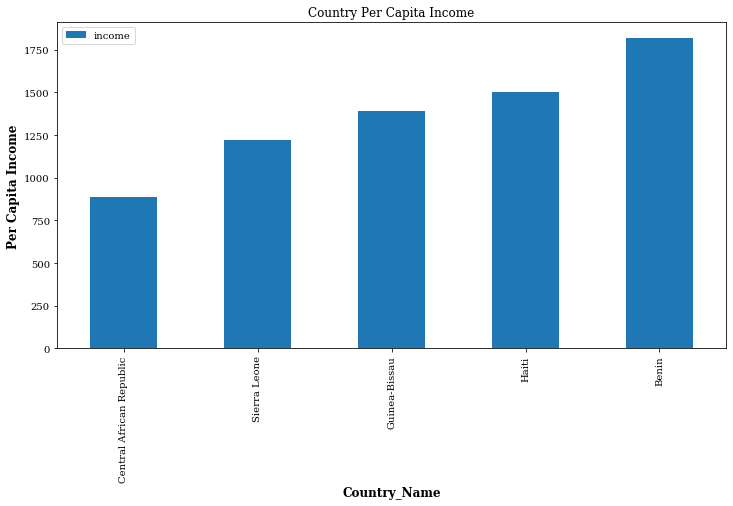

In [66]:
# Visualise using Barplot for Income of countries which are in need of aid.
final_country_by_km_inc = pd.DataFrame(KMeans_Cluster2.groupby(['country'])['income'].mean().sort_values(ascending = True))
labels=final_country_by_km_inc.plot(kind = 'bar',figsize = (12,6))
plt.title('Country Per Capita Income')
plt.xlabel('Country_Name',fontsize = 12, fontweight = 'bold')
plt.ylabel('Per Capita Income', fontsize = 12, fontweight = 'bold')
plt.show()

In [67]:
# Above list of coutries are important for analysis due to low income and these countries needs to be aid for socio-economic factors.

### Step 6. Model Building with Hierarchical Clustering

In [68]:
scaled_country_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.283914,-0.799751,-0.862453,-0.810688,-1.090722,0.438327,-1.497644,2.144947,-1.008933
1,-0.690600,-0.368668,-0.135196,-0.106679,0.120363,-0.452051,0.951647,-1.027330,-0.146394
2,-0.403544,-0.144231,-0.398814,-0.344379,0.552685,1.636289,0.976018,-0.084015,-0.056165
3,-0.859614,1.373936,1.370196,1.997144,1.455177,-1.000667,1.012574,-0.662176,1.831324
4,-0.746938,-0.051655,1.687646,-0.244183,1.396951,2.499685,0.890719,-0.479599,1.367987


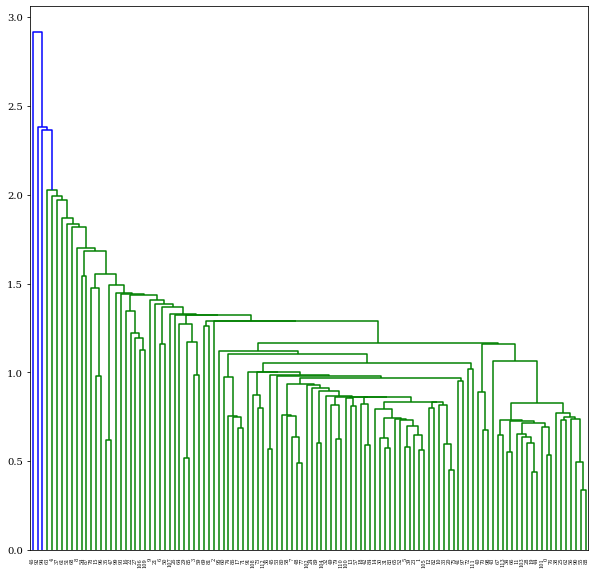

In [69]:
# Hierarchical Clustering with Single linkage method
plt.figure(figsize = (10,10))
mergings = linkage(scaled_country_df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

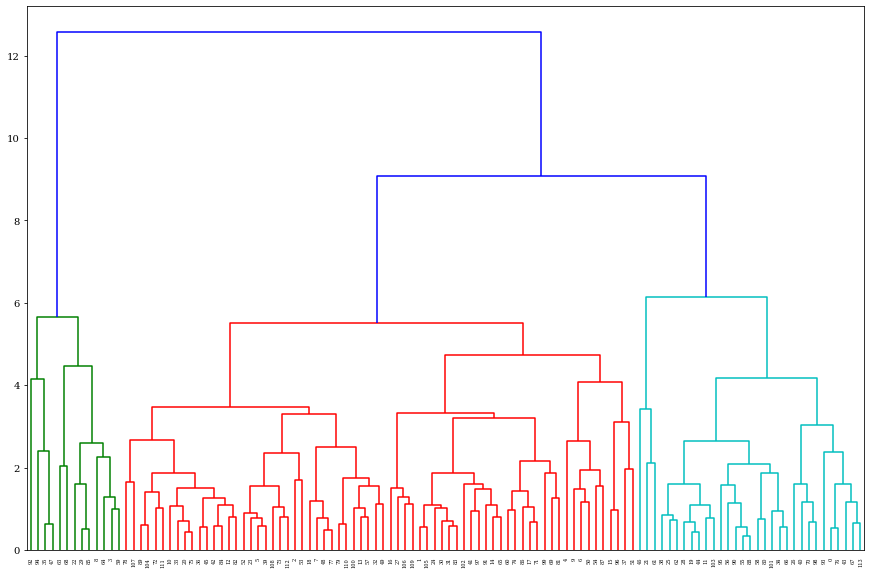

In [70]:
# Hierarchical Clustering with Complete linkage method
plt.figure(figsize = (15,10))
mergings = linkage(scaled_country_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [71]:
# Complete linkage provide good understanding of hierarchical clustering as compared to single linkage.

In [72]:
df_hc = country_df.copy()
df_hc = df_hc.drop('ClusterID',axis=1)
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300


In [73]:
df_hc.shape

(114, 10)

In [74]:
# Cut the dendogram vertically with n_clusters value is 3.
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       2, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 1,
       0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0])

In [75]:
# Assign cluster ID's to hierarchical_clustering data.
df_hc['ClusterID'] = cluster_labels
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.90,75.8,2.37,10300,1


In [76]:
# Check no. of countries in each clusterID.
df_hc['ClusterID'].value_counts()

1    70
0    31
2    13
Name: ClusterID, dtype: int64

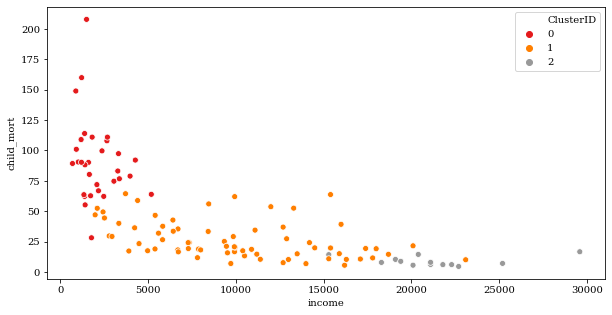

In [77]:
# scaterplot between income and child_mort for different clusterid
plt.figure(figsize = (10,5))
sns.scatterplot(x='income',y='child_mort',hue='ClusterID',legend='full',data=df_hc,palette='Set1')

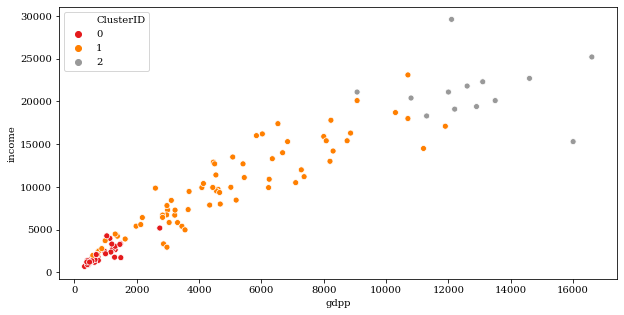

In [78]:
# scaterplot between gdpp and income for different clusterid
plt.figure(figsize = (10,5))
sns.scatterplot(x='gdpp',y='income',hue='ClusterID',legend='full',data=df_hc,palette='Set1')

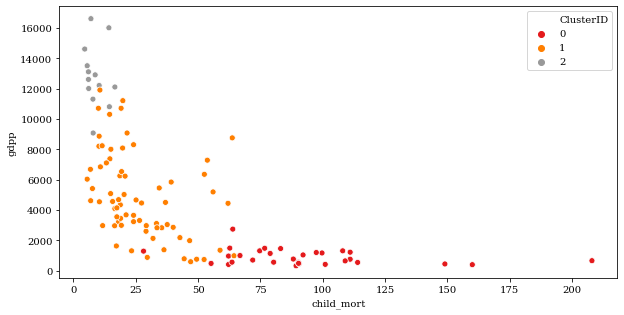

In [79]:
# scaterplot between child_mort and gdpp with different clusterid
plt.figure(figsize = (10,5))
sns.scatterplot(x='child_mort',y='gdpp',hue='ClusterID',legend='full',data=df_hc,palette='Set1')

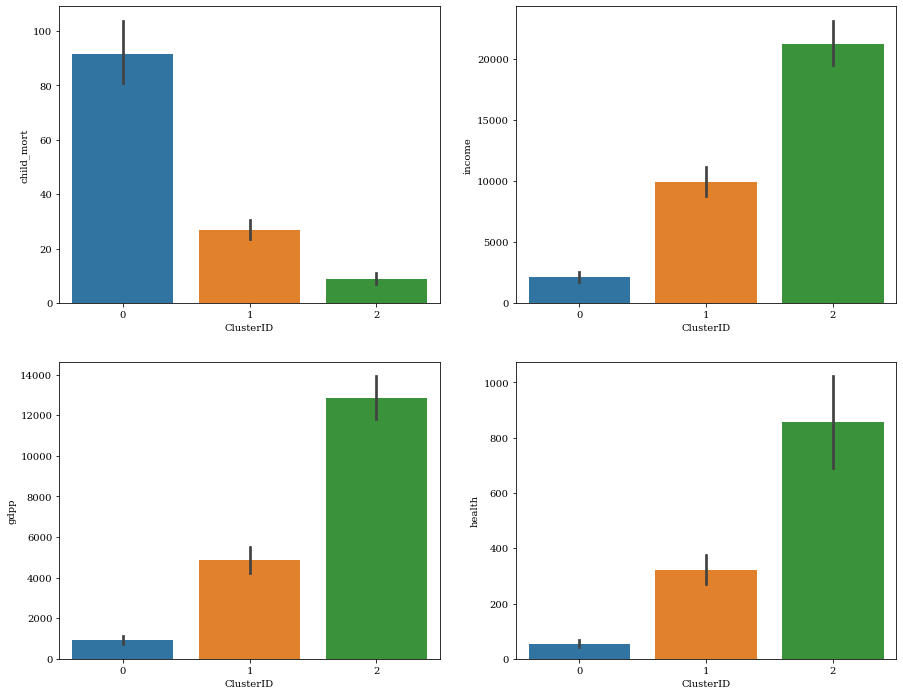

In [80]:
# LEt's visualise using barplot
fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.barplot(x = 'ClusterID', y = 'child_mort', data = df_hc,ax=axes[0][0])
sns.barplot(x = 'ClusterID', y = 'income', data = df_hc,ax=axes[0][1])
sns.barplot(x = 'ClusterID', y = 'gdpp', data=df_hc,ax=axes[1][0])
sns.barplot(x = 'ClusterID', y = 'health', data=df_hc,ax=axes[1][1])
plt.show()

In [81]:
# ClusterID = 0 has more no. of children mortality contries present which need to be aid and these are having 
# very low GDPP and Income as well.

In [82]:
# Check mean. Computing mean we noticed that clusreID = 0 requires more attention.
df_hc[['child_mort','income','gdpp','ClusterID']].groupby('ClusterID').mean()

,child_mort,income,gdpp
ClusterID,,,
0,91.580645,2102.451613,903.677419
1,26.757143,9945.428571,4855.885714
2,8.846154,21261.538462,12828.461538


#### Cluster Profiling on Hierarchical Clustering

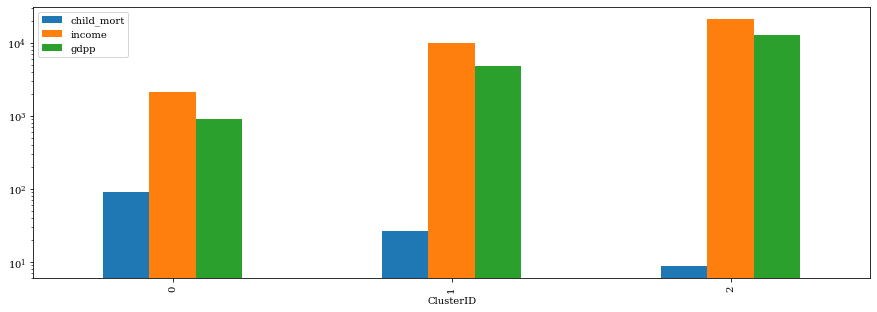

In [83]:
labels=df_hc[['child_mort','income','gdpp','ClusterID']].groupby('ClusterID').mean().plot(kind = 'bar',figsize = (15,5))
plt.yscale('log')
plt.show();

In [84]:
# From Hierarchical clustering, Cluster 0 requires more attention due to high children mortality , low income, low GDPP.

In [85]:
# Hierarchical cluster =2 which has high GDPP, high income and low child_mortality among all 3 clusters. That's good.
Hierarchi_Cluster2= df_hc[df_hc['ClusterID']==2].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
Hierarchi_Cluster2.reset_index(drop=True).country[:5]

0                  Libya
1             Seychelles
2               Barbados
3    Antigua and Barbuda
4                  Chile
Name: country, dtype: object

In [86]:
# Hierarchical cluster =1 which has good GDPP, good income and average child_mortality among all 3 clusters.
Hierarchi_Cluster1 = df_hc[df_hc['ClusterID']==1].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
Hierarchi_Cluster1.reset_index(drop=True).country[:5]

0         Myanmar
1           Gabon
2    Turkmenistan
3           India
4         Namibia
Name: country, dtype: object

In [87]:
# Hierarchical Cluster=0 has very high child_mortality among all 3 clusters. Will be use for analysis.
Hierarchi_Cluster0= df_hc[df_hc['ClusterID']==0].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
Hierarchi_Cluster0.reset_index(drop=True).country[:5]

0                       Haiti
1                Sierra Leone
2    Central African Republic
3               Guinea-Bissau
4                       Benin
Name: country, dtype: object

In [88]:
# From Hierarchical, above are the countries which requires aid for socio-economic factor into considerations.

In [89]:
# Final List of countries which are in need of the aid based on socio-economic factors
Final_country_by_HC = df_hc[df_hc['ClusterID']==0].sort_values(by = ['child_mort','income','gdpp'], ascending = [False, True, True]).head()
Final_country_by_HC['country']
Final_country_by_HC.reset_index(drop=True).country[:5]

0                       Haiti
1                Sierra Leone
2    Central African Republic
3               Guinea-Bissau
4                       Benin
Name: country, dtype: object

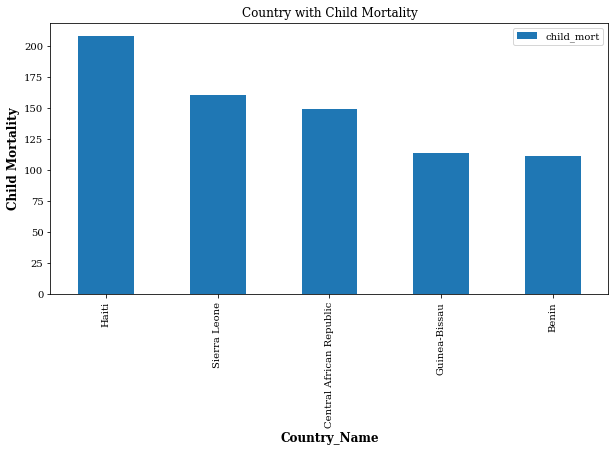

In [90]:
# Visualise using Barpplot for very high child mortality of countries which are in need of aid.
final_country_by_hc_child = pd.DataFrame(Hierarchi_Cluster0.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
labels=final_country_by_hc_child.plot(kind = 'bar',figsize = (10,5))
plt.title('Country with Child Mortality')
plt.xlabel('Country_Name',fontsize = 12, fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

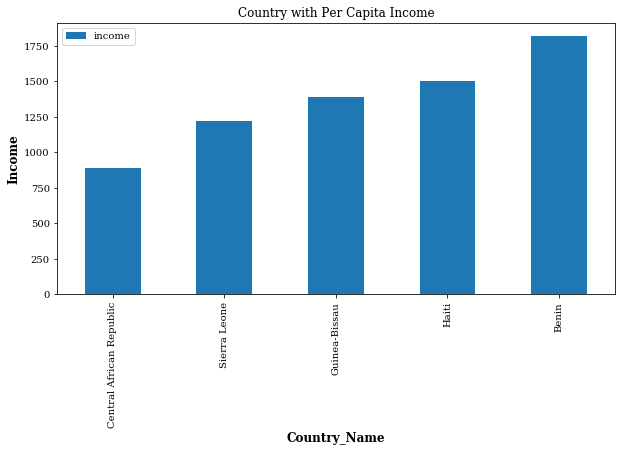

In [91]:
# Visualise using Barpplot for very low income of countries which are in need of aid.
final_country_by_hc_income = pd.DataFrame(Hierarchi_Cluster0.groupby(['country'])['income'].mean().sort_values(ascending = True))
labels=final_country_by_hc_income.plot(kind = 'bar',figsize = (10,5))
plt.title('Country with Per Capita Income')
plt.xlabel('Country_Name',fontsize = 12, fontweight = 'bold')
plt.ylabel('Income', fontsize = 12, fontweight = 'bold')
plt.show()

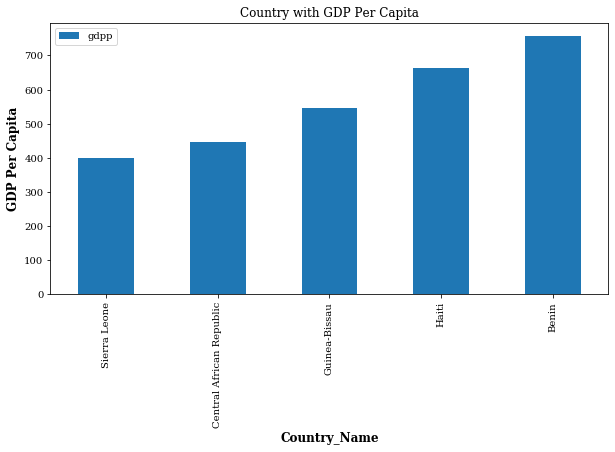

In [92]:
# Visualise using Barpplot for very low GDP per capita of countries which are in need of aid.
final_country_by_hc_gdp = pd.DataFrame(Hierarchi_Cluster0.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
labels=final_country_by_hc_gdp.plot(kind = 'bar',figsize = (10,5))
plt.title('Country with GDP Per Capita')
plt.xlabel('Country_Name',fontsize = 12, fontweight = 'bold')
plt.ylabel('GDP Per Capita', fontsize = 12, fontweight = 'bold')
plt.show()

In [93]:
# Number of countries in each cluster in K-Means 
country_df.ClusterID.value_counts()

0    56
2    31
1    27
Name: ClusterID, dtype: int64

In [94]:
# Number of countries in each cluster for Hierarchical clustering
df_hc.ClusterID.value_counts()

1    70
0    31
2    13
Name: ClusterID, dtype: int64

####  Final Conclusion - 
-  For experimenting K-Means and Hierarchical Clustering , got the same number of country count. I noticed 
   that Hierarchical clustering, data is not comparetively evenly distributed like K-Means. I recommended to use of K-Means 
   clustering to identify the countries which needs to be aid for socio-economic and health development.
   Final list of coutries are that are in need for the aid are below:

In [95]:
#Final Contry Names with K-Means
Final_country_by_KM.reset_index(drop=True).country

0                       Haiti
1                Sierra Leone
2    Central African Republic
3               Guinea-Bissau
4                       Benin
Name: country, dtype: object

In [96]:
# Final countries Names with Hierarchical clustering
Final_country_by_HC.reset_index(drop=True).country

0                       Haiti
1                Sierra Leone
2    Central African Republic
3               Guinea-Bissau
4                       Benin
Name: country, dtype: object